# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# 1  Изучение данных из файла

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# Открываем файл и выводим первые 10 строк
# Вызываем функцию info() для оценки заполненности таблицы, соответствия типов данных столбцов хранимым в них значениях
calls = pd.read_csv('/datasets/calls.csv')
display(calls.head(10))
calls.info()
internet = pd.read_csv('/datasets/internet.csv')
display(internet.head(10))
internet.info()
messages = pd.read_csv('/datasets/messages.csv')
display(messages.head(10))
messages.info()
tariffs = pd.read_csv('/datasets/tariffs.csv')
display(tariffs.head(10))
tariffs.info()
users = pd.read_csv('/datasets/users.csv')
display(users.head(10))
users.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [3]:
#Проверим на наличие дубликатов
calls.duplicated().sum()
internet.duplicated().sum()
messages.duplicated().sum()
tariffs.duplicated().sum()
users.duplicated().sum()

0

**Вывод**:
1. Столбцы с датой имеют тип object, необходимо перевести к формату даты
2. Имеются пропуски: churn_date (тариф ещё действовал на момент выгрузки данных)
3. Необходимо объединить таблицы (звонки, сообщения, интернет) в единый датафрейм, заполнить пропуски.

#  2 Предобработка данных

In [4]:
# Вынесем столбец по месяцам отдельно в каждой таблице
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month

In [5]:
calls['duration'] = np.ceil(calls['duration'])
display(calls.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [6]:
# Сгруппируем таблицы по паре пользователь+месяц,
# посчитаем количество израсходованных минут, мегабайтов, отправленных сообщений в месяц
calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns = {'id': 'messages'}).reset_index()

In [7]:
# Объединим таблицы(звонки, сообщения, интернет) в одну
data = calls.merge(messages, on=['user_id', 'month'],  how='outer' ).merge(internet, on=['user_id', 'month'], how='outer' )
display(data)
display(data.info())

,user_id,month,duration,messages,mb_used
0,1000,5,159.0,22.0,2253.49
1,1000,6,172.0,60.0,23233.77
2,1000,7,340.0,75.0,14003.64
3,1000,8,408.0,81.0,14055.93
4,1000,9,466.0,57.0,14568.91
...,...,...,...,...,...
3209,1489,9,NaN,32.0,17206.30
3210,1489,10,NaN,21.0,19559.44
3211,1489,11,NaN,20.0,17491.56
3212,1489,12,NaN,35.0,17322.51


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   duration  3174 non-null   float64
 3   messages  2717 non-null   float64
 4   mb_used   3203 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 150.7 KB


None

In [8]:
# Заменим пропуски в столбцах duration, messages, mb_used на "0" (вероятно, пользователь не совершал звонков,не отправлял смс, не использовал мегабайты в данном месяце)
columns = ['messages', 'duration', 'mb_used']
for column in columns:
    data[column] = data[column].fillna(0) 

In [9]:
# Изменим тип столбца messages с float64 на int64
data['messages'] = data['messages'].astype('int64')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   duration  3214 non-null   float64
 3   messages  3214 non-null   int64  
 4   mb_used   3214 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 150.7 KB


None

In [10]:
# Добавим к получившейся сводной таблице данные по пользователям и тарифам
data = data.merge(users, on = 'user_id', how = 'left').merge(tariffs, left_on = 'tariff', 
                                                                 right_on = 'tariff_name', how = 'left')
display(data.head(10))

,user_id,month,duration,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,60,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,75,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,81,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,57,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
5,1000,10,350.0,73,14702.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
6,1000,11,338.0,58,14756.47,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
7,1000,12,333.0,70,9817.61,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
8,1001,11,430.0,0,18429.34,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,smart
9,1001,12,414.0,0,14036.66,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,smart


In [11]:
# Посчитаем сколько звонков, сообщений и интернета израсходавано у каждого пользователя сверх тарифа в месяц
data['over_calls'] = (data['duration'] - data['minutes_included'])*data['rub_per_minute'] 
data['over_messages'] = (data['messages'] - data['messages_included'])*data['rub_per_message'] 
data['over_mb_used'] = np.ceil((data['mb_used'] - data['mb_per_month_included'])/1024)*data['rub_per_gb']
display(data)

,user_id,month,duration,messages,mb_used,age,churn_date,city,first_name,last_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,over_calls,over_messages,over_mb_used
0,1000,5,159.0,22,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,ultra,-2841.0,-978,-4050.0
1,1000,6,172.0,60,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,ultra,-2828.0,-940,-1050.0
2,1000,7,340.0,75,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,ultra,-2660.0,-925,-2400.0
3,1000,8,408.0,81,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,ultra,-2592.0,-919,-2400.0
4,1000,9,466.0,57,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,ultra,-2534.0,-943,-2250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,32,17206.30,35,NaN,Санкт-Петербург,Павел,Гончаров,...,15360,500,550,200,3,3,smart,-1500.0,-54,400.0
3210,1489,10,0.0,21,19559.44,35,NaN,Санкт-Петербург,Павел,Гончаров,...,15360,500,550,200,3,3,smart,-1500.0,-87,1000.0
3211,1489,11,0.0,20,17491.56,35,NaN,Санкт-Петербург,Павел,Гончаров,...,15360,500,550,200,3,3,smart,-1500.0,-90,600.0
3212,1489,12,0.0,35,17322.51,35,NaN,Санкт-Петербург,Павел,Гончаров,...,15360,500,550,200,3,3,smart,-1500.0,-45,400.0


In [12]:
# Уберем отрицательные значения
data.loc[data['over_calls']<0, 'over_calls'] = 0
data.loc[data['over_messages']<0, 'over_messages'] = 0
data.loc[data['over_mb_used']<0, 'over_mb_used'] = 0

In [13]:
# Посчитаем получившуюся выручку в месяц
data['fee'] = data['rub_monthly_fee'] + data['over_calls'] + data['over_messages'] + data['over_mb_used']
display(data)

,user_id,month,duration,messages,mb_used,age,churn_date,city,first_name,last_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,over_calls,over_messages,over_mb_used,fee
0,1000,5,159.0,22,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0,0.0,1950.0
1,1000,6,172.0,60,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0,0.0,1950.0
2,1000,7,340.0,75,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0,0.0,1950.0
3,1000,8,408.0,81,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0,0.0,1950.0
4,1000,9,466.0,57,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0.0,0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,32,17206.30,35,NaN,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0.0,0,400.0,950.0
3210,1489,10,0.0,21,19559.44,35,NaN,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0.0,0,1000.0,1550.0
3211,1489,11,0.0,20,17491.56,35,NaN,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0.0,0,600.0,1150.0
3212,1489,12,0.0,35,17322.51,35,NaN,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0.0,0,400.0,950.0


**Вывод**: Объединили данные в единый датафрейм, посчитали использованные сверх тарифа минуты, сообщения и мегабайты, посчитали месячную выручку для каждого клиента, добавили необходимые столбцы для дальнейшего анализа.

# 3 Анализ данных

In [14]:
# Сделаем срез по двум тарифам
data_smart = data[data['tariff_name'] == 'smart']
data_ultra = data[data['tariff_name'] == 'ultra']

In [15]:
# Посмотрим среднюю выручку в двух тарифах
display(data_smart['fee'].describe())

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: fee, dtype: float64

In [16]:
display(data_ultra['fee'].describe())

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: fee, dtype: float64

In [17]:
# Напишем функцию с учетом удаления выбросов
def calculate_range(data, column):
    
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

In [18]:
# Напишем функцию для оптимизации построения гистограмм
def create_hist(data, column, title):
    data[column].hist(bins=100, range = calculate_range(data, column))
    display(data[column].mean())
    plt.title(title)
    plt.show()

417.9349484073576

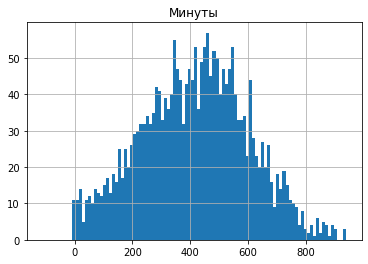

In [19]:
#Построим гистограмму для минут разговора в тарифе smart
create_hist(data_smart,'duration', 'Минуты')

На данном графике представлено нормальное распределение.

33.384028712427096

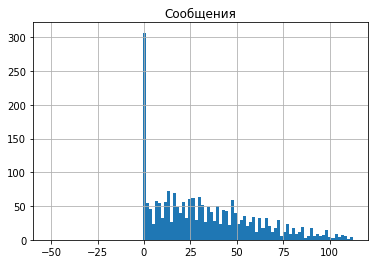

In [20]:
#Построим гистограмму для количества сообщений в тарифе smart
create_hist(data_smart,'messages', 'Сообщения')

На данном графике представлено распределение Пуассона. Пик у нуля, вероятно, связан с тем, что многие клиенты не отправляют сообщения.

16208.386989681472

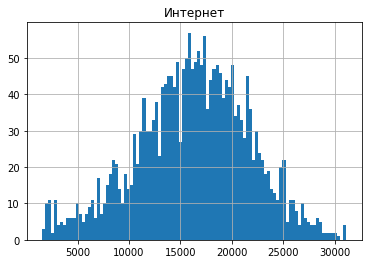

In [21]:
#Построим гистограмму для количества мегабайт интернета в тарифе smart
create_hist(data_smart,'mb_used', 'Интернет')

На данном графике представлено нормальное распределение.

526.6233502538071

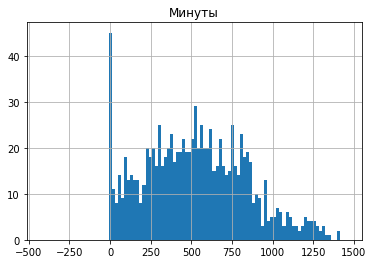

In [22]:
#Построим гистограмму для минут разговора в тарифе ultra
create_hist(data_ultra,'duration', 'Минуты')

На данном графике представлено распределение Пуассона. Пик у нуля, вероятно, связан с тем, что многие клиенты не используют минуты разговора (возможно, общаются больше через мессенджеры).

49.36345177664975

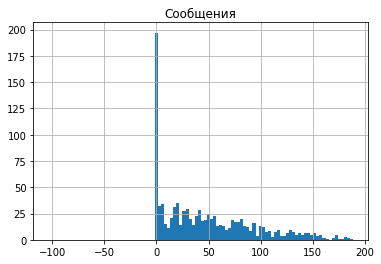

In [23]:
#Построим гистограмму для количества сообщений в тарифе ultra
create_hist(data_ultra,'messages', 'Сообщения')

На данном графике представлено распределение Пуассона. Пик у нуля, вероятно, связан с тем, что многие клиенты не отправляют сообщения.

19468.805208121827

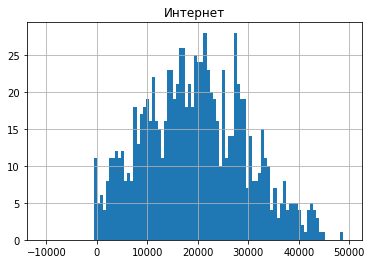

In [24]:
#Построим гистограмму для количества мегабайт интернета в тарифе ultra
create_hist(data_ultra,'mb_used', 'Интернет')

На данном графике представлено нормальное распределение.

In [25]:
# Посчитаем дисперсию для двух тарифов
variance_estimate_smart = np.var(data_smart, ddof=1)
display(variance_estimate_smart) 
display()
variance_estimate_ultra = np.var(data_ultra, ddof=1)
display(variance_estimate_ultra) 

user_id                  2.135091e+04
month                    8.528245e+00
duration                 3.621932e+04
messages                 7.968130e+02
mb_used                  3.446250e+07
age                      2.674328e+02
messages_included        0.000000e+00
mb_per_month_included    0.000000e+00
minutes_included         0.000000e+00
rub_monthly_fee          0.000000e+00
rub_per_gb               0.000000e+00
rub_per_message          0.000000e+00
rub_per_minute           0.000000e+00
over_calls               6.453415e+04
over_messages            1.626297e+03
over_mb_used             5.425264e+05
fee                      6.697857e+05
dtype: float64

user_id                  1.979506e+04
month                    8.247014e+00
duration                 1.008736e+05
messages                 2.285266e+03
mb_used                  1.017510e+08
age                      2.926830e+02
messages_included        0.000000e+00
mb_per_month_included    0.000000e+00
minutes_included         0.000000e+00
rub_monthly_fee          0.000000e+00
rub_per_gb               0.000000e+00
rub_per_message          0.000000e+00
rub_per_minute           0.000000e+00
over_calls               0.000000e+00
over_messages            0.000000e+00
over_mb_used             1.415167e+05
fee                      1.415167e+05
dtype: float64

In [26]:
# Посчитаем стандартное отклонение для двух тарифов
standard_deviation_smart = np.sqrt(variance_estimate_smart)
display(standard_deviation_smart) 
standard_deviation_ultra = np.sqrt(variance_estimate_ultra)
display(standard_deviation_ultra) 

user_id                   146.119496
month                       2.920316
duration                  190.313730
messages                   28.227876
mb_used                  5870.476681
age                        16.353371
messages_included           0.000000
mb_per_month_included       0.000000
minutes_included            0.000000
rub_monthly_fee             0.000000
rub_per_gb                  0.000000
rub_per_message             0.000000
rub_per_minute              0.000000
over_calls                254.035718
over_messages              40.327368
over_mb_used              736.563904
fee                       818.404367
dtype: float64

user_id                    140.694908
month                        2.871762
duration                   317.606098
messages                    47.804457
mb_used                  10087.170752
age                         17.107979
messages_included            0.000000
mb_per_month_included        0.000000
minutes_included             0.000000
rub_monthly_fee              0.000000
rub_per_gb                   0.000000
rub_per_message              0.000000
rub_per_minute               0.000000
over_calls                   0.000000
over_messages                0.000000
over_mb_used               376.187114
fee                        376.187114
dtype: float64

In [27]:
#Используем правило трех сигм для нормальных распределений
adv_smart_duration = data_smart['duration'].mean() + (3*standard_deviation_smart['duration'])
adv_smart_mb_used = data_smart['mb_used'].mean() + (3*standard_deviation_smart['mb_used'])
display(adv_smart_duration)
display(adv_smart_mb_used)

988.8761380749961

33819.81703282907

In [28]:
adv_ultra_mb_used = data_ultra['mb_used'].mean() + (3*standard_deviation_ultra['mb_used'])
display(adv_ultra_mb_used)

49730.317464619926

**Вывод**:
1. В тарифе smart пользователи в среднем тратят 394 минуты, 33 сообщения, 16208 мегабайт интернета в месяц, в тарифе ultra - 497, 49, 19468 соответственно.
2. В тарифе ultra многие клиенты не используют минуты разговора и сообщения.
3. В тарифе  smart  99% пользователей используют 934 минуты разговора,  33819 мегабайт интернета в месяц.
4. В тарифе ultra 99% пользователей используют 49730 мегабайт интернета в месяц.
5. Средняя выручка больше от пользовательей тарифа ultra (2070руб), чем от пользователей тарифа smart(1257руб).

# 4 Проверка гипотез

Формулируем нулевую гипотезу для условия равенства. Для проверки двусторонних гипотез используем t-тест.

Нулевая гипотеза 1: разница в средних выручках пользователей тарифов «Ультра» и «Смарт» статистически незначима.

Альтернативная гипотеза 1: разница в средних выручках пользователей тарифов «Ультра» и «Смарт» статистически значима.

In [29]:
alpha = .05
results = st.ttest_ind(
    data_smart['fee'], 
    data_ultra['fee'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


In [30]:
# Сделаем срезы по пользователям из Москвы и других регионов
data_msk = data[data['city'] == 'Москва']
data_not_msk = data[data['city'] != 'Москва']


Нулевая гипотеза 2: средняя выручка пользователей из Москвы статистически значимо не отличается от средней выручки пользователей из других регионов.

Альтернативная гипотеза 2: средняя выручка пользователей из Москвы статистически значимо отличается от выручки пользователей из других регионов.

In [31]:
alpha = .05
results = st.ttest_ind(
    data_msk['fee'], 
    data_not_msk['fee'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


**Вывод**: таким образом, верны гипотезы:
1. Разница в средних выручках пользователей тарифов «Ультра» и «Смарт» статистически значима.
2. Средняя выручка пользователей из Москвы статистически значимо не отличается от средней выручки пользователей из других регионов.

#  Общий вывод:

В ходе исследования мы выяснили, что:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
2. Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
3. В тарифе smart пользователи в среднем тратят 394 минуты, 33 сообщения, 16208 мегабайт интернета в месяц, в тарифе ultra - 497, 49, 19468 соответственно. Т.е. в среднем, пользователи укладываются в рамки включенных в тариф единиц.
4. В тарифе ultra многие клиенты не используют минуты разговора и сообщения.
5. Средняя выручка больше от пользовательей тарифа ultra (2070руб), чем от пользователей тарифа smart(1257руб).
6. Пользователей тарифа smart в настоящее время больше, чем ultra.

Учитывая вышеописанное, я бы советовала привлекать больше клиентов в тариф ultra в связи с большей выручкой для компании.